In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

# we will first load dataset 
student_performance = r"C:\Users\DELL\Desktop\StudentsPerformance.csv"
df = pd.read_csv(student_performance)

In [23]:
print(df.info())
print(df.head())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      s

# 1. Distribution Plots 

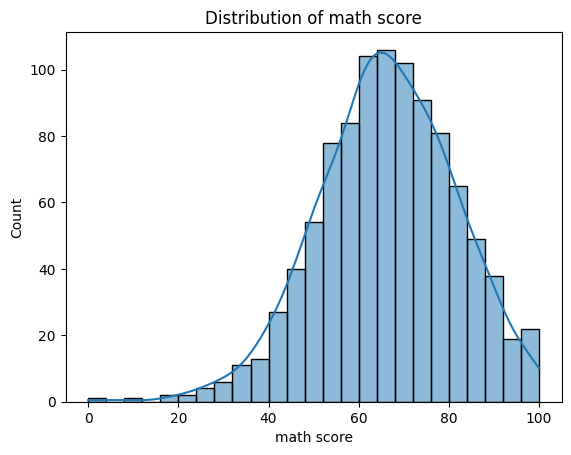

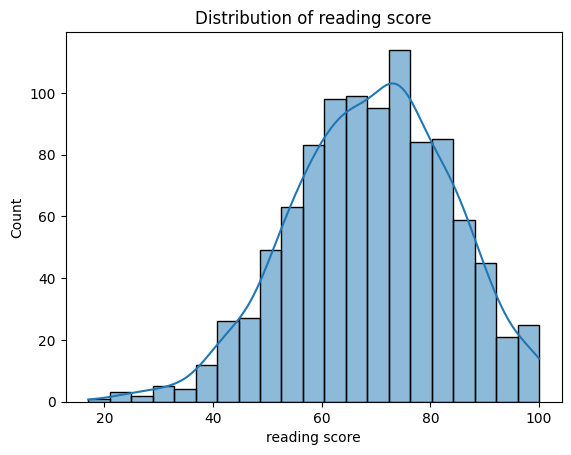

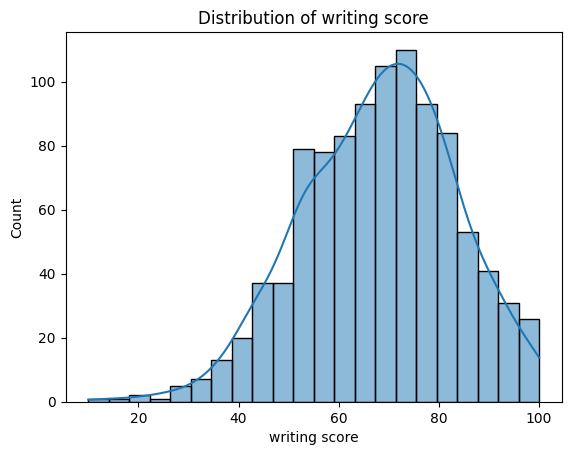

In [24]:
score_cols = ['math score', 'reading score', 'writing score']

for c in score_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution of {c}")
    plt.show()


# 2. Relationship Plots

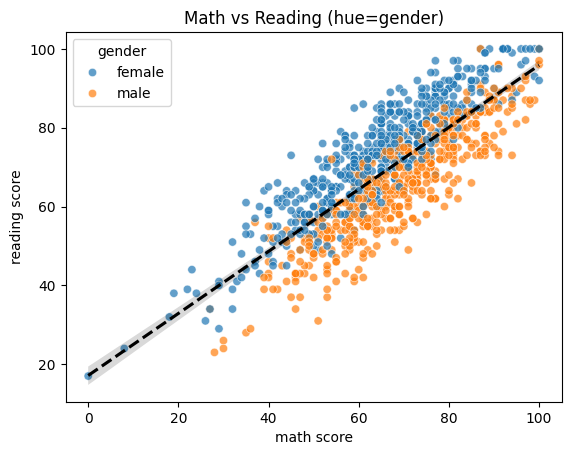

In [25]:
sns.scatterplot(data=df, x="math score", y="reading score", hue="gender", alpha=0.7)
sns.regplot(data=df, x="math score", y="reading score", scatter=False, color="black", line_kws={"ls":"--"})
plt.title("Math vs Reading (hue=gender)")
plt.show()

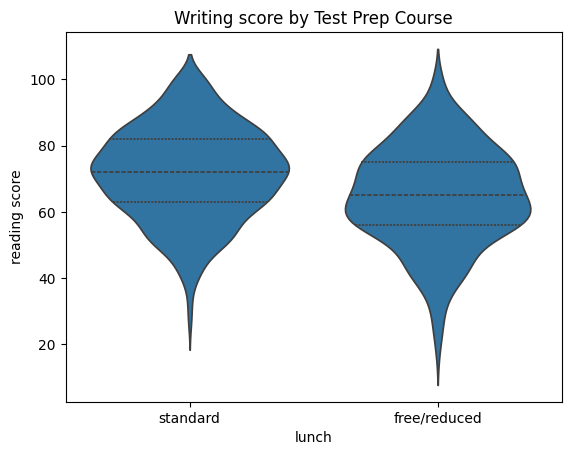

In [26]:
sns.violinplot(data = df, x = "lunch", y = "reading score", inner = "quartile")
plt.title("Writing score by Test Prep Course")
plt.show()

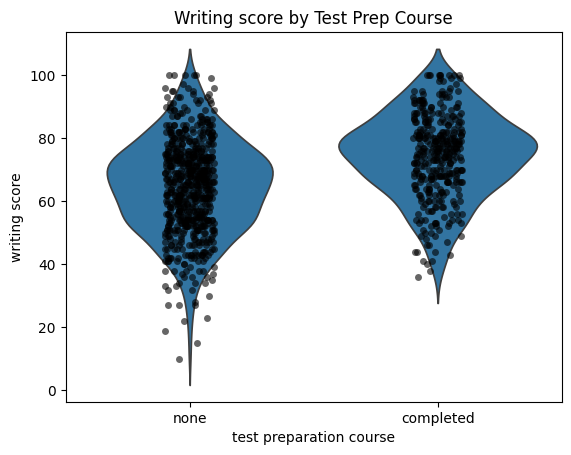

In [27]:
plt.figure()
sns.violinplot(data=df, x="test preparation course", y="writing score", inner=None)
sns.stripplot(data=df, x="test preparation course", y="writing score", color="k", alpha=0.6)
plt.title("Writing score by Test Prep Course")
plt.show()

# 3. Matrix Plotm

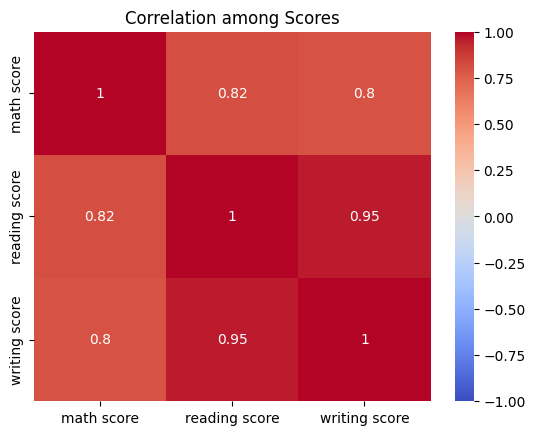

In [28]:
corr = df[score_cols].corr()
plt.figure()
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation among Scores")
plt.show()

# 4. Bar / Count Plots

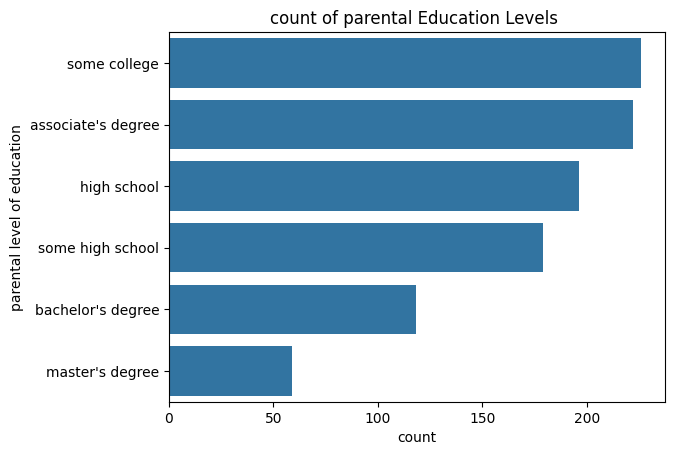

In [29]:
plt.figure()
order = df["parental level of education"].value_counts().index
sns.countplot(data = df, y = "parental level of education", order = order)
plt.title("count of parental Education Levels ")
plt.show()

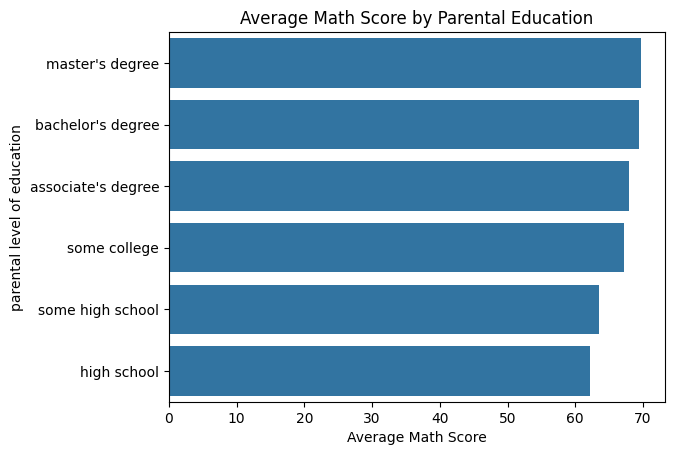

In [30]:
means = df.groupby("parental level of education")["math score"].mean().sort_values(ascending=False)
plt.figure()
sns.barplot(x=means.values, y=means.index)
plt.xlabel("Average Math Score")
plt.title("Average Math Score by Parental Education")
plt.show()

# QUESTIONS REGARDING THIS 

### Q1: Which gender has higher average math scores?

In [31]:
average_gender = df.groupby("gender")["math score"].mean()
print("Average Maths score by Gender:/n",average_gender)

Average Maths score by Gender:/n gender
female    63.633205
male      68.728216
Name: math score, dtype: float64


### Q2: Writing score by test prep

In [32]:
print("\nWriting score by test prep:\n", df.groupby("test preparation course")["writing score"].describe())


Writing score by test prep:
                          count       mean        std   min   25%   50%   75%  \
test preparation course                                                        
completed                358.0  74.418994  13.375335  36.0  66.0  76.0  83.0   
none                     642.0  64.504673  14.999661  10.0  54.0  65.0  74.0   

                           max  
test preparation course         
completed                100.0  
none                     100.0  


### Q3: Strongest correlation among three scores

In [33]:
c = df[score_cols].corr().abs()
np.fill_diagonal(c.values, 0)
i,j = np.unravel_index(c.values.argmax(), c.shape)
print(f"\nStrongest correlation: {c.index[i]} & {c.columns[j]} (r={c.values.max():.2f})")


Strongest correlation: reading score & writing score (r=0.95)


### Q4: Highest reading score by parental education

In [34]:
print("\nAverage reading score by parental education:\n",
      df.groupby("parental level of education")["reading score"].mean().sort_values(ascending=False))


Average reading score by parental education:
 parental level of education
master's degree       75.372881
bachelor's degree     73.000000
associate's degree    70.927928
some college          69.460177
some high school      66.938547
high school           64.704082
Name: reading score, dtype: float64
